In [1]:
3#ake News ✍ Classification Using LSTM & Bi-Directional LSTM

3

In [4]:
# Importing the Dataset
import pandas as pd
df = pd.read_csv("/content/train.csv",engine='python',error_bad_lines=False)

<ipython-input-4-346f29a94ff8>:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv("/content/train.csv",engine='python',error_bad_lines=False)
Skipping line 2181: unexpected end of data


In [5]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2179 entries, 0 to 2178
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2179 non-null   int64 
 1   title   2122 non-null   object
 2   author  1952 non-null   object
 3   text    2173 non-null   object
 4   label   2179 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 85.2+ KB


In [7]:
# If there are any Null Values

df.isnull().sum()

id          0
title      57
author    227
text        6
label       0
dtype: int64

In [8]:
# Drop Nan Values (Rows)- As its a text data , we can't replace the Title & Author Name with something else

df=df.dropna(how='all',axis=0)

In [9]:
df

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
2174,2174,These People Reversed Their Diabetes In 30 Days,REALdeal,Diabetes is one of the most rampant diseases o...,1
2175,2175,Links 11/1/16,Yves Smith,The Doctrine of Armed Exceptionalism LobeLog (...,1
2176,2176,Flash-Mob Meditations To Occur At Voting Stati...,Madeline,"Posted by Madeline | Oct 30, 2016 | 2016 , Dai...",1
2177,2177,Trump’s grandfather was a pimp and tax evader;...,Ian Greenhalgh,Trump’s grandfather was a pimp and tax evade...,1


In [10]:
import tensorflow as tf

In [11]:
# Importing Libraries w.r.t Word Embedding layer & Lstm NN
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [14]:
# Get the Independent Features
X=df.drop('label',axis=1)
# Get the Dependent features
Y=df['label']

In [58]:
X.shape

(2179, 4)

In [15]:
messages=X.copy()

In [17]:
messages['title'][1]

'FLYNN: Hillary Clinton, Big Woman on Campus - Breitbart'

In [18]:
messages.head()

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [19]:
!Merging the author name and news title ~ Act as Input Text to Analyse

/bin/bash: line 1: Merging: command not found


In [20]:
df['content'] = df['author']+' '+df['title']

In [21]:
print(df['content'])

0       Darrell Lucus House Dem Aide: We Didn’t Even S...
1       Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...
2       Consortiumnews.com Why the Truth Might Get You...
3       Jessica Purkiss 15 Civilians Killed In Single ...
4       Howard Portnoy Iranian woman jailed for fictio...
                              ...                        
2174    REALdeal These People Reversed Their Diabetes ...
2175                             Yves Smith Links 11/1/16
2176    Madeline Flash-Mob Meditations To Occur At Vot...
2177    Ian Greenhalgh Trump’s grandfather was a pimp ...
2178    Warner Todd Huston Postman Arrested for Feedin...
Name: content, Length: 2179, dtype: object


In [22]:
Y.value_counts()

1    1109
0    1070
Name: label, dtype: int64

In [23]:
messages = df

In [24]:
#Text Pre-Processing of Data

In [25]:
# Importing Essential Libraries for Text - Pre-Processing

import re # Regex
import nltk
import gensim # Word2Vec

# In Builts
nltk.download('stopwords') # stopwords
nltk.download('punkt') # Tokenizer - to use sent_tokenize, word_tokenize
nltk.download('wordnet') # Lemmatization

from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
STEMMING
A stemming algorithm is a process of linguistic normalisation, in which the variant forms of a word are reduced to a common form.
In simple words, Stemming is the process of reducing a word to its Root word with not considering the Morphological Meaning of the Root Word
EXAMPLES: 1. actor, actress, acting --> act 2. eating, eats, eaten --> eat 3. race,racing --> rac

In [26]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z0-9]',' ', str(messages['title'][i]))
    review = review.lower()
    review = review.split()

    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [27]:
corpus[1]

'flynn hillari clinton big woman campu breitbart'

In [ ]:
LEMMATIZATION
A stemming algorithm is a process of linguistic normalisation, in which the variant forms of a word are reduced to a common form.
In simple words, Stemming is the process of reducing a word to its Root word with considering the Morphological Meaning of the Root Word
EXAMPLES: 1. actor, actress, acting --> act 2. eating, eats, eaten --> eat 3. snow,snowing,snowed --> snow

In [28]:
# Only having Lower & Upper Case Alphabets & Numbers, Removing Stop Words, Applying Lemmatization

from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

cleaned_corpus = []
for i in range(len(messages)):
    review = re.sub('[^a-zA-Z0-9]',' ',str(messages['content'][i]))
    review = review.lower()
    review = review.split()
    review = [lemmatizer.lemmatize(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    cleaned_corpus.append(review)

In [29]:
cleaned_corpus[1]

'daniel j flynn flynn hillary clinton big woman campus breitbart'

In [30]:
# Removing empty Sentences from Corpus w.r.t Corpus
cleaned_corpus = [i for i in cleaned_corpus if i]
len(cleaned_corpus)

2177

In [ ]:
1. Word Embedding Layer with LSTM
Involves 4 Steps:

Converting sentences into Words
One_Hot Rep for each sent - [each sentence will have values ~ len(sen[i]) & it will be index where that particular word comes 1]
Applying Pre/ Post Padding to make length of each sentences fixed
Creating Model - Adding Embedding Layer, LSTM Layer & DropOut Layer, Output Layer

In [39]:
'''Vocabulary size ~ The More value, the bigger One Hot rep
Each word will have a vector size of 5000 Indices/ Dimensions each'''

voc_size=5000

In [ ]:
Step 1 & 2 - Cleaned Sentences into Words & One_Hot Rep for each sent - [each sentence will have values ~ len(sen[i]) & it will be index where that particular word comes 1]

In [40]:
onehot_repr=[one_hot(words,voc_size)for words in cleaned_corpus]
onehot_repr

[[400, 1247, 3590, 431, 4008, 615, 4986, 936, 3558, 2546, 4046, 1340],
 [3699, 2000, 3165, 3165, 4543, 1754, 1481, 3123, 1123, 3889],
 [4701, 1902, 2549, 3312, 1056, 4971],
 [4246, 200, 3925, 1239, 2191, 1485, 1545, 1728, 2229],
 [2424, 973, 1848, 3123, 3191, 829, 4989, 4432, 3123, 52, 2900, 2878],
 [3699,
  2748,
  4871,
  3398,
  1450,
  4902,
  3010,
  1175,
  3043,
  4215,
  3156,
  591,
  276,
  844,
  375,
  1053,
  3889],
 [3256],
 [3677,
  2000,
  4917,
  3409,
  1600,
  4849,
  3049,
  1943,
  3103,
  1001,
  2619,
  2633,
  3938,
  2682],
 [3256],
 [4722,
  3494,
  2035,
  4054,
  1547,
  351,
  582,
  3371,
  935,
  3303,
  1175,
  1566,
  2633,
  3938,
  2682],
 [2259, 1640, 33, 4152, 4934, 839, 3355, 3542, 2385, 182, 1175, 4879],
 [4434, 392, 868, 4996, 4920, 4653, 2322, 3344, 503, 2070],
 [712, 2943, 1763, 2661, 1871, 440, 2442, 2031, 3051, 4074, 1953, 2827, 1247],
 [2546, 3689, 1545, 4669, 4986, 2849, 1175, 935],
 [3539, 2344, 1977, 2162, 1824, 2898, 4556, 1475, 887, 851

In [41]:
cleaned_corpus[2]

'consortiumnews com truth might get fired'

In [42]:
# Finding the Max_len & Min_len of the Sentences w.r.t Cleaned_Corpus

def max_minlen(cleaned_corpus):
  max_l = float('-inf')
  min_l = float('inf')
  for i in cleaned_corpus:
    if len(i.split())>max_l:
      max_l = len(i.split())
    if len(i.split())<min_l:
      min_l = len(i.split())
  return max_l,min_l # max_l & min_l
max_minlen(cleaned_corpus)

(51, 1)

In [43]:
# Truth word has an index of 2039
onehot_repr[2]

[4701, 1902, 2549, 3312, 1056, 4971]

In [ ]:
Step 3 - Applying Pre/ Post Padding
'''Fixing the length of Each Sentence by adding 0's so that it can be used for Training the Model'''

In [44]:
sent_length=40 # max sent length
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length) # Pre - adding zeros at the beg
print(embedded_docs)

[[   0    0    0 ... 2546 4046 1340]
 [   0    0    0 ... 3123 1123 3889]
 [   0    0    0 ... 3312 1056 4971]
 ...
 [   0    0    0 ... 2095 2626 3190]
 [   0    0    0 ... 1472  427 1367]
 [   0    0    0 ... 2589 1859 1755]]


In [45]:
embedded_docs[1]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0, 3699, 2000, 3165,
       3165, 4543, 1754, 1481, 3123, 1123, 3889], dtype=int32)

In [46]:
embedded_docs[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,  400, 1247, 3590,  431, 4008,
        615, 4986,  936, 3558, 2546, 4046, 1340], dtype=int32)

In [ ]:
Step 4: Creating Model - Adding Embedding Layer, LSTM Layer & DropOut Layer, Output Layer

In [48]:
embedding_vector_features=50 ## feature representation
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(LSTM(100)) # 100 Neurons - Hyper-Parameter for LSTM
model.add(Dense(1,activation='sigmoid')) # Output Layer
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy']) # Compiling the model

In [49]:
# 1. Embedding Layer - 40 Fixed length of each sentence, 50 - feature/dimesions size with 50 different values for each word in range [-1,+1], LSTM - with 100 Neurons, Total Params ~ 31 K
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 40, 50)            250000    
                                                                 
 lstm (LSTM)                 (None, 100)               60400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 310501 (1.18 MB)
Trainable params: 310501 (1.18 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [51]:
# Input and Output Shape
len(embedded_docs),Y.shape

(2177, (2179,))

In [52]:
# Input and Output Shape
len(embedded_docs),Y.shape

(2177, (2179,))

In [53]:
# Converting Both into Arrays

import numpy as np
X_final=np.array(embedded_docs)
Y_final=np.array(Y)

In [56]:
X_final.shape,Y_final.shape

((2177, 40), (2179,))

In [59]:
Y_final

array([1, 0, 1, ..., 1, 1, 0])

In [63]:
import numpy as np

# Assuming X_final and Y_final are NumPy arrays
# If they are not, you can convert them using np.array().

# Example data
X_final = np.random.rand(2177, 40)
Y_final = np.random.rand(2179)

# Get the indices of the rows you want to delete
indices_to_delete = np.random.choice(Y_final.shape[0], size=2, replace=False)

# Print the indices before deletion
print("Indices to delete:", indices_to_delete)

# Delete the rows from Y_final
Y_final = np.delete(Y_final, indices_to_delete)

# Print the shape after deletion
print("New Y_final shape:", Y_final.shape)


Indices to delete: [1529 1726]
New Y_final shape: (2177,)


In [68]:
# Train & Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, Y_final, test_size=0.30, random_state=0)

In [ ]:
Model Training and Evaluation

In [71]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=20)

Epoch 1/100
77/77 [==============================] - 11s 37ms/step - loss: 0.6937 - accuracy: 0.0000e+00 - val_loss: 0.6931 - val_accuracy: 0.0000e+00
Epoch 2/100
77/77 [==============================] - 1s 9ms/step - loss: 0.6934 - accuracy: 0.0000e+00 - val_loss: 0.6928 - val_accuracy: 0.0000e+00
Epoch 3/100
77/77 [==============================] - 1s 7ms/step - loss: 0.6932 - accuracy: 0.0000e+00 - val_loss: 0.6928 - val_accuracy: 0.0000e+00
Epoch 4/100
77/77 [==============================] - 1s 7ms/step - loss: 0.6932 - accuracy: 0.0000e+00 - val_loss: 0.6933 - val_accuracy: 0.0000e+00
Epoch 5/100
77/77 [==============================] - 1s 8ms/step - loss: 0.6933 - accuracy: 0.0000e+00 - val_loss: 0.6931 - val_accuracy: 0.0000e+00
Epoch 6/100
77/77 [==============================] - 1s 7ms/step - loss: 0.6932 - accuracy: 0.0000e+00 - val_loss: 0.6930 - val_accuracy: 0.0000e+00
Epoch 7/100
77/77 [==============================] - 1s 7ms/step - loss: 0.6932 - accuracy: 0.0000e+00 -

In [ ]:
Model Tuning & Optimization

In [ ]:
Using Early Stopping '''Early Stopping is a very different way to regularize the machine learning model. The way it does is to stop training as soon as the validation error reaches a minimum. The figure below shows a model being trained.'''

In [72]:
%%time
## Creating model
embedding_vector_features=50
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(Dropout(0.3))
model.add(LSTM(100))
model.add(Dropout(0.3)) # Model Tuning
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

CPU times: user 359 ms, sys: 0 ns, total: 359 ms
Wall time: 514 ms


In [73]:
callback = tf.keras.callbacks.EarlyStopping(patience=4, mode='min', restore_best_weights=True) # Early Stopping

In [81]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=20,callbacks=[callback])

Epoch 1/100
77/77 [==============================] - 1s 8ms/step - loss: 0.6933 - accuracy: 0.0000e+00 - val_loss: 0.6927 - val_accuracy: 0.0000e+00
Epoch 2/100
77/77 [==============================] - 1s 8ms/step - loss: 0.6932 - accuracy: 0.0000e+00 - val_loss: 0.6931 - val_accuracy: 0.0000e+00
Epoch 3/100
77/77 [==============================] - 1s 8ms/step - loss: 0.6935 - accuracy: 0.0000e+00 - val_loss: 0.6927 - val_accuracy: 0.0000e+00
Epoch 4/100
77/77 [==============================] - 1s 7ms/step - loss: 0.6935 - accuracy: 0.0000e+00 - val_loss: 0.6928 - val_accuracy: 0.0000e+00
Epoch 5/100
77/77 [==============================] - 1s 8ms/step - loss: 0.6933 - accuracy: 0.0000e+00 - val_loss: 0.6930 - val_accuracy: 0.0000e+00


In [82]:
# Sentence with 40 Values - Have 37 zero Values & 3 words having index value w.r.t 5000 Vocab Size
X_test[0]

array([0.20781867, 0.55517987, 0.29132241, 0.41255091, 0.52630287,
       0.78777787, 0.04236799, 0.31755218, 0.47762673, 0.22063665,
       0.76393672, 0.60616919, 0.20650291, 0.91332431, 0.44373007,
       0.72357057, 0.03210402, 0.70207578, 0.1837397 , 0.67473348,
       0.79862053, 0.0523113 , 0.84448686, 0.83029725, 0.20079556,
       0.3559004 , 0.18923694, 0.28056803, 0.00324046, 0.07148398,
       0.65221407, 0.14524263, 0.4406047 , 0.81582418, 0.39864132,
       0.22722745, 0.67005499, 0.05412534, 0.11583244, 0.72247918])

In [83]:
y_pred=model.predict(X_test)

21/21 [==============================] - 0s 4ms/step


In [84]:
y_pred=np.where(y_pred > 0.5, 1,0) ##AUC ROC Curve - To select the Probability to choose the Threshold Value for Classification

In [85]:
# Predicting the Label on One Row # 0 - Reliable News Article, 1 - Fake News Article

if (y_pred[0]==0):
  print(f'The News is Realiable & labelled as {y_pred[0]} and in real it is {y_test[0]}')
else:
  print(f'The News is Fake & labelled as {y_pred[0]} and in real it is {[y_test[0]]}')

The News is Realiable & labelled as [0] and in real it is 0.6460833548491882


In [ ]:
2. Word Embedding Layer with Bi- Directional LSTM

In [97]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Bidirectional

In [98]:
## Creating model

embedding_vector_features=50
model2=Sequential()
model2.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model2.add(Bidirectional(LSTM(100))) # 100 Neurons Forward & Backward
# model2.add(Dropout(0.3)) # Model Tuning
model2.add(Dense(1,activation='sigmoid'))
model2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [99]:
print(model2.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 40, 50)            250000    
                                                                 
 bidirectional (Bidirection  (None, 200)               120800    
 al)                                                             
                                                                 
 dense_2 (Dense)             (None, 1)                 201       
                                                                 
Total params: 371001 (1.42 MB)
Trainable params: 371001 (1.42 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [100]:
%%time
model2.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=20)

Epoch 1/100
77/77 [==============================] - 8s 28ms/step - loss: 0.6938 - accuracy: 0.0000e+00 - val_loss: 0.6931 - val_accuracy: 0.0000e+00
Epoch 2/100
77/77 [==============================] - 1s 12ms/step - loss: 0.6934 - accuracy: 0.0000e+00 - val_loss: 0.6928 - val_accuracy: 0.0000e+00
Epoch 3/100
77/77 [==============================] - 1s 9ms/step - loss: 0.6936 - accuracy: 0.0000e+00 - val_loss: 0.6928 - val_accuracy: 0.0000e+00
Epoch 4/100
77/77 [==============================] - 1s 14ms/step - loss: 0.6933 - accuracy: 0.0000e+00 - val_loss: 0.6930 - val_accuracy: 0.0000e+00
Epoch 5/100
77/77 [==============================] - 1s 10ms/step - loss: 0.6934 - accuracy: 0.0000e+00 - val_loss: 0.6928 - val_accuracy: 0.0000e+00
Epoch 6/100
77/77 [==============================] - 1s 9ms/step - loss: 0.6933 - accuracy: 0.0000e+00 - val_loss: 0.6931 - val_accuracy: 0.0000e+00
Epoch 7/100
77/77 [==============================] - 1s 9ms/step - loss: 0.6933 - accuracy: 0.0000e+00

In [108]:
y_pred2= model2.predict(X_test)

21/21 [==============================] - 0s 4ms/step


In [ ]:
Compairing the Lstm & Bi - Directional Model w.r.t Accuracy

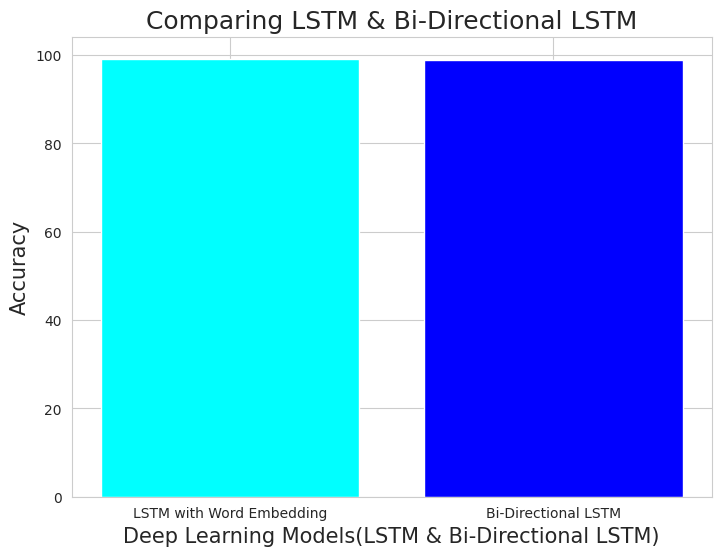

In [107]:
# Graph for Compairing Test Accuracy btw Different Machine Learnn Algorithms

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (8, 5)
fig = plt.figure()
ax = fig.add_axes([0.5,0.5,0.8,0.92])
#left,bootom ,width ,height
#Add an axes to the figure.
Models = ['LSTM with Word Embedding','Bi-Directional LSTM']     #X AXIS
accuracy = [99.2,98.9]  #Y AXIS ~ R2 Score in Percentage
colors = ['cyan','blue']
ax.bar(Models,accuracy,color=colors)        #rgkyc-different color
plt.title("Comparing LSTM & Bi-Directional LSTM",fontsize=18)    #title label
plt.xlabel("Deep Learning Models(LSTM & Bi-Directional LSTM)",fontsize=15)    #X label
plt.ylabel("Accuracy",fontsize=15)    #Y label
plt.show()
y_pred2=np.where(y_pred2 > 0.5, 1,0) ##AUC ROC Curve - To select the Probability to choose the Threshold Value for Classification

In [ ]:
Results & Conclusion:
📌 Best Model out of Bag Of Words (Bi,Tri,Quad Grams), TF-IDF, Word2Vec, Avg Word2Vec, LSTM & Bi-Directional LSTM with Word Embedding Layer w.r.t this P.S is LSTM with Accuracy of 99.15 %

Accuracy -- 99.15 %
Loss -- 0.192</b>